In [1]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)#1列のデータに変換
x_train = x_train.astype("float32")
x_train /= 255#0から255までのRGBを0から1までの値に変換
#print(x_train[0])

Using TensorFlow backend.


In [13]:
import matplotlib.pyplot as plt
img_id = 42
vertical_edge_fil = np.array([[-2, 1, 1],
                              [-2, 1, 1],
                              [-2, 1, 1]],
                             dtype=float)
horizontal_edge_fil = np.array([[1, 1, 1],
                                [1, 1, 1],
                                [-2, -2, -2]],
                               dtype=float)
img_x = x_train[img_id, :, :, 0]#42番目のすべてのデータ、1列目のデータ(1列しかない)を指定
#print(img_x)
img_height = 28
img_width = 28
img_x = img_x.reshape(img_height, img_width)#28*28の行列に変換
vertical_edge = np.zeros_like(img_x)#垂直方向フィルターをかけた値を格納する行列(img_xと同じ行列数)を用意し、0で埋める
#print(vertical_edge)
horizontal_edge = np.zeros_like(img_x)#水平方向フィルターをかけた値を格納する行列(img_xと同じ行列数)を用意し、0で埋める

for h in range(img_height - 3):
    for w in range(img_width - 3):
        img_region = img_x[h:h + 3, w:w + 3]#フィルターを適用する範囲は高さ(hからh+2)、幅(wからw+2)の範囲 ここでは3*3の行列を指す
        #フィルター適用範囲の行列(3*3)を行ベクトル(1*9)に変換したものと、
        #フィルター(3*3)を行ベクトル(1*9)に変換したものとの内積(要素同士すべて掛けて足し合わせた値,スカラー)を、格納用行列(3*3)の中央(h+1,w+1)に代入する
        vertical_edge[h + 1, w + 1] = np.dot(img_region.reshape(-1),#reshape(-1):行ベクトル(1行の行列)に変換
                                             vertical_edge_fil.reshape(-1))
        #print(img_region.reshape(-1),vertical_edge_fil.reshape(-1))
        horizontal_edge[h + 1, w + 1] = np.dot(img_region.reshape(-1),
                                               horizontal_edge_fil.reshape(-1))

7


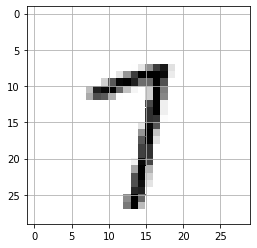

In [14]:
print(y_train[img_id])
plt.figure(figsize=(4, 4))
plt.gray()
plt.pcolor(1 - img_x)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.grid(True)
plt.show()

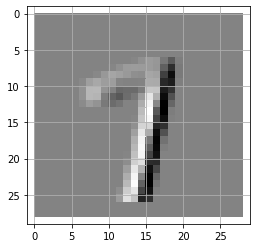

In [5]:
plt.figure(figsize=(4,4))
plt.gray()
plt.pcolor(vertical_edge)
plt.xlim(-1,29)
plt.ylim(29,-1)
plt.grid(True)
plt.show()

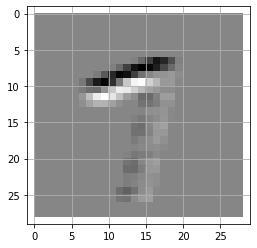

In [6]:
plt.figure(figsize=(4, 4))
plt.gray()
plt.pcolor(horizontal_edge)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.grid(True)
plt.show()